In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
import os

# Check if the code is running on Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Mount Google Drive
    drive.mount('/content/drive')

    # Set notebook path in Google Colab
    notebook_path = "/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/5_Project"

    # Change the current working directory to notebook path
    os.chdir(notebook_path)

    # Print current working directory
    print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/5_Project


In [ ]:
df = pd.read_csv("KL_weather.csv")
display(df)

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),is_day (),sunshine_duration (s)
0,2023-01-01T00:00,23.4,88,21.3,27.3,0.0,0.0,1012.8,1007.3,30,...,25.8,27.3,28.1,28.4,0.434,0.459,0.483,0.497,1,0.0
1,2023-01-01T01:00,24.9,82,21.6,29.2,0.0,0.0,1013.7,1008.3,30,...,26.2,27.3,28.1,28.4,0.434,0.458,0.483,0.497,1,2567.5
2,2023-01-01T02:00,26.5,75,21.6,30.6,0.0,0.0,1014.4,1009.0,30,...,27.3,27.3,28.1,28.4,0.432,0.458,0.483,0.497,1,3600.0
3,2023-01-01T03:00,27.7,68,21.2,31.6,0.0,0.0,1014.1,1008.7,30,...,28.9,27.3,28.1,28.4,0.427,0.458,0.483,0.497,1,3600.0
4,2023-01-01T04:00,29.0,62,21.0,34.2,0.0,0.0,1013.3,1007.9,30,...,30.7,27.5,28.1,28.4,0.420,0.458,0.483,0.497,1,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-01-01T19:00,25.1,91,23.5,30.6,0.0,0.0,1010.1,1004.7,20,...,26.8,29.2,28.9,29.2,0.443,0.477,0.495,0.450,0,0.0
8780,2024-01-01T20:00,24.6,94,23.7,29.9,0.0,0.0,1009.4,1004.0,11,...,26.5,29.1,28.9,29.2,0.444,0.476,0.495,0.450,0,0.0
8781,2024-01-01T21:00,25.0,91,23.4,30.5,0.0,0.0,1009.7,1004.3,36,...,26.3,28.9,28.9,29.2,0.445,0.476,0.495,0.450,0,0.0
8782,2024-01-01T22:00,24.4,96,23.7,29.9,0.0,0.0,1009.8,1004.4,31,...,26.1,28.8,28.9,29.2,0.445,0.475,0.495,0.450,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                8784 non-null   object 
 1   temperature_2m (°C)                 8784 non-null   float64
 2   relative_humidity_2m (%)            8784 non-null   int64  
 3   dew_point_2m (°C)                   8784 non-null   float64
 4   apparent_temperature (°C)           8784 non-null   float64
 5   precipitation (mm)                  8784 non-null   float64
 6   rain (mm)                           8784 non-null   float64
 7   pressure_msl (hPa)                  8784 non-null   float64
 8   surface_pressure (hPa)              8784 non-null   float64
 9   cloud_cover (%)                     8784 non-null   int64  
 10  cloud_cover_low (%)                 8784 non-null   int64  
 11  cloud_cover_mid (%)                 8784 no

In [ ]:
new_column_names = {
    'soil_temperature_0_to_7cm (°C)'  :  'soil_temperature_0_7cm (°C)',
    'soil_temperature_7_to_28cm (°C)' :  'soil_temperature_7_28cm (°C)',
    'soil_temperature_28_to_100cm (°C)' : 'soil_temperature_28_100cm (°C)',
    'soil_temperature_100_to_255cm (°C)' : 'soil_temperature_100_255cm (°C)',
    'soil_moisture_0_to_7cm (m³/m³)'     :  'soil_moisture_0_7cm (m³/m³)',
    'soil_moisture_7_to_28cm (m³/m³)'     : 'soil_moisture_7_28cm (m³/m³)',
    'soil_moisture_28_to_100cm (m³/m³)'   : 'soil_moisture_28_100cm (m³/m³)',
    'soil_moisture_100_to_255cm (m³/m³)'  :  'soil_moisture_100_255cm (m³/m³)'

}
df = df.rename(columns=new_column_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             8784 non-null   object 
 1   temperature_2m (°C)              8784 non-null   float64
 2   relative_humidity_2m (%)         8784 non-null   int64  
 3   dew_point_2m (°C)                8784 non-null   float64
 4   apparent_temperature (°C)        8784 non-null   float64
 5   precipitation (mm)               8784 non-null   float64
 6   rain (mm)                        8784 non-null   float64
 7   pressure_msl (hPa)               8784 non-null   float64
 8   surface_pressure (hPa)           8784 non-null   float64
 9   cloud_cover (%)                  8784 non-null   int64  
 10  cloud_cover_low (%)              8784 non-null   int64  
 11  cloud_cover_mid (%)              8784 non-null   int64  
 12  cloud_cover_high (%)

No duplicates

In [ ]:
df.duplicated().sum()

0

No missing values

In [ ]:
df.isnull().any()

time                               False
temperature_2m (°C)                False
relative_humidity_2m (%)           False
dew_point_2m (°C)                  False
apparent_temperature (°C)          False
precipitation (mm)                 False
rain (mm)                          False
pressure_msl (hPa)                 False
surface_pressure (hPa)             False
cloud_cover (%)                    False
cloud_cover_low (%)                False
cloud_cover_mid (%)                False
cloud_cover_high (%)               False
et0_fao_evapotranspiration (mm)    False
vapour_pressure_deficit (kPa)      False
wind_speed_10m (km/h)              False
wind_speed_100m (km/h)             False
wind_direction_10m (°)             False
wind_direction_100m (°)            False
wind_gusts_10m (km/h)              False
soil_temperature_0_7cm (°C)        False
soil_temperature_7_28cm (°C)       False
soil_temperature_28_100cm (°C)     False
soil_temperature_100_255cm (°C)    False
soil_moisture_0_

In [ ]:
# Convert 'time' column to datetime object
df['time'] = pd.to_datetime(df['time'])

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   time                             8784 non-null   datetime64[ns]
 1   temperature_2m (°C)              8784 non-null   float64       
 2   relative_humidity_2m (%)         8784 non-null   int64         
 3   dew_point_2m (°C)                8784 non-null   float64       
 4   apparent_temperature (°C)        8784 non-null   float64       
 5   precipitation (mm)               8784 non-null   float64       
 6   rain (mm)                        8784 non-null   float64       
 7   pressure_msl (hPa)               8784 non-null   float64       
 8   surface_pressure (hPa)           8784 non-null   float64       
 9   cloud_cover (%)                  8784 non-null   int64         
 10  cloud_cover_low (%)              8784 non-null   int64      

In [ ]:
#define temperature classes based on adjusted thresholds
def classify_temperature(temperature):
    if temperature >= 35:
        return 'Extreme'
    elif 30 <= temperature < 35:
        return 'Heavy'
    elif 25 <= temperature < 30:
        return 'Moderate'
    else:
        return 'Light'

#apply the function to create a new column 'temperature_class'
df['temperature_class'] = df['temperature_2m (°C)'].apply(classify_temperature)

#check the unique values in the new 'temperature_class' column
unique_temperature_classes = df['temperature_class'].unique()
print(unique_temperature_classes)


['Light' 'Moderate' 'Heavy']


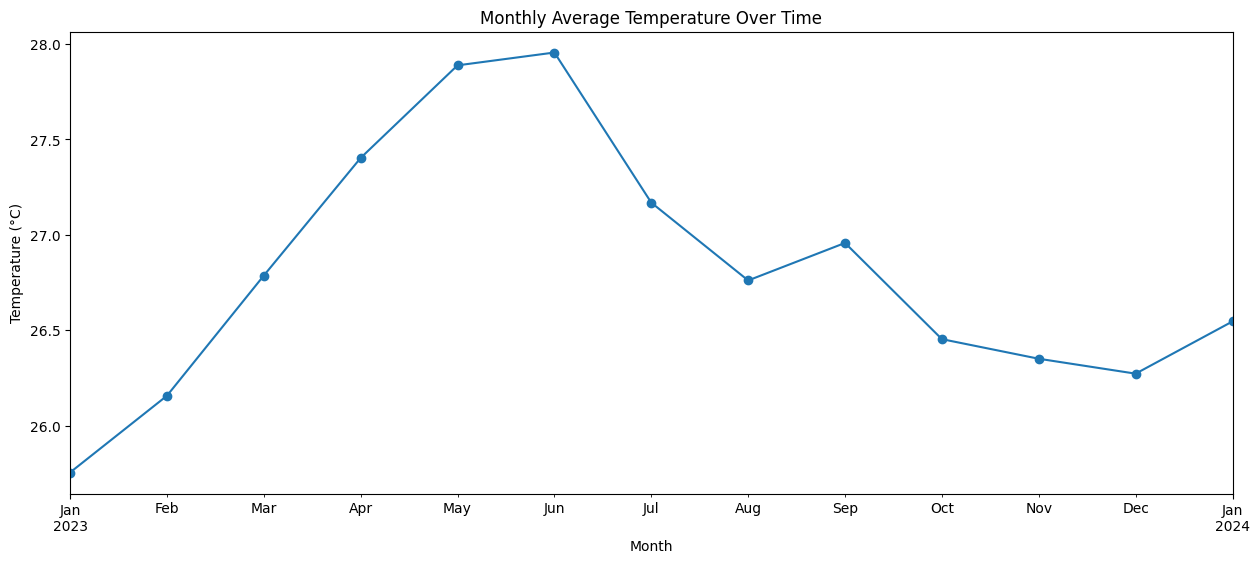

In [ ]:
#set 'time' column as the index
df.set_index('time', inplace=True)

#resample data to monthly frequency and calculate the mean
monthly_avg = df['temperature_2m (°C)'].resample('M').mean()

#plot the monthly average temperature
plt.figure(figsize=(15, 6))
monthly_avg.plot(marker='o')
plt.title('Monthly Average Temperature Over Time')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


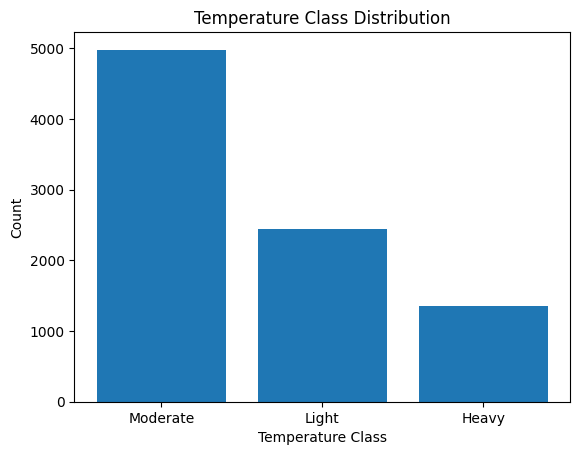

In [ ]:
#count the occurrences of each temperature class
temperature_class_counts = df['temperature_class'].value_counts()

#plot the bar chart
plt.bar(temperature_class_counts.index, temperature_class_counts.values)
plt.title('Temperature Class Distribution')
plt.xlabel('Temperature Class')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),...,soil_temperature_7_28cm (°C),soil_temperature_28_100cm (°C),soil_temperature_100_255cm (°C),soil_moisture_0_7cm (m³/m³),soil_moisture_7_28cm (m³/m³),soil_moisture_28_100cm (m³/m³),soil_moisture_100_255cm (m³/m³),is_day (),sunshine_duration (s),temperature_class
time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,23.4,88,21.3,27.3,0.0,0.0,1012.8,1007.3,30,0,...,27.3,28.1,28.4,0.434,0.459,0.483,0.497,1,0.0,Light
2023-01-01 01:00:00,24.9,82,21.6,29.2,0.0,0.0,1013.7,1008.3,30,0,...,27.3,28.1,28.4,0.434,0.458,0.483,0.497,1,2567.5,Light
2023-01-01 02:00:00,26.5,75,21.6,30.6,0.0,0.0,1014.4,1009.0,30,0,...,27.3,28.1,28.4,0.432,0.458,0.483,0.497,1,3600.0,Moderate
2023-01-01 03:00:00,27.7,68,21.2,31.6,0.0,0.0,1014.1,1008.7,30,0,...,27.3,28.1,28.4,0.427,0.458,0.483,0.497,1,3600.0,Moderate
2023-01-01 04:00:00,29.0,62,21.0,34.2,0.0,0.0,1013.3,1007.9,30,0,...,27.5,28.1,28.4,0.420,0.458,0.483,0.497,1,3600.0,Moderate


In [ ]:
# Drop the 'temperature_2m (°C)' column
df.drop('temperature_2m (°C)', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2023-01-01 00:00:00 to 2024-01-01 23:00:00
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   relative_humidity_2m (%)         8784 non-null   int64  
 1   dew_point_2m (°C)                8784 non-null   float64
 2   apparent_temperature (°C)        8784 non-null   float64
 3   precipitation (mm)               8784 non-null   float64
 4   rain (mm)                        8784 non-null   float64
 5   pressure_msl (hPa)               8784 non-null   float64
 6   surface_pressure (hPa)           8784 non-null   float64
 7   cloud_cover (%)                  8784 non-null   int64  
 8   cloud_cover_low (%)              8784 non-null   int64  
 9   cloud_cover_mid (%)              8784 non-null   int64  
 10  cloud_cover_high (%)             8784 non-null   int64  
 11  et0_fao_evapotranspiration (mm)  8784 non-null

In [ ]:
df.to_csv(notebook_path + "/cleaned_data (No feature selection).csv", index=False)

# Feature Selection

# ANOVA

ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not. [(Brownlee, 2020)](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/#:~:text=each%20in%20turn.-,ANOVA%20f%2Dtest%20Feature%20Selection,the%20same%20distribution%20or%20not.)


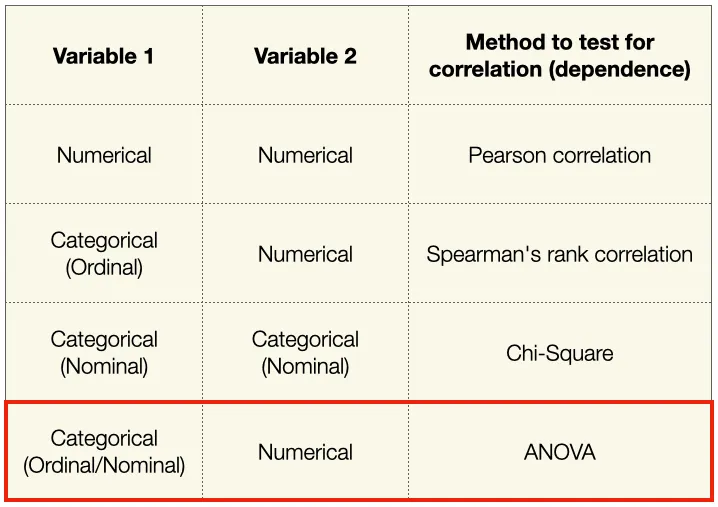

ANOVA is particularly useful when the target variable is categorical, as it assesses the differences in means among groups. In this case, 'temperature_class' is a categorical variable.\

**SelectKBest:** In this code, SelectKBest is employed to select the top k features based on their scores from ANOVA.\
**Reason:** It allows automatic selection of the most informative features, reducing the dimensionality of the dataset and retaining the most relevant ones.

In [ ]:
X = df.drop(columns=['temperature_class'])
y = df['temperature_class']

#Initialize SelectKBest with the f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=20)

#Fit the selector to data
X_selected = selector.fit_transform(X, y)

#Get the selected features
selected_features = X.columns[selector.get_support()]

#Include 'temperature_class' in the selected features
selected_features = list(selected_features) + ['temperature_class']

#Create a new DataFrame with selected features and the target variable
df_selected = df[selected_features]

#Display the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['relative_humidity_2m (%)', 'dew_point_2m (°C)', 'apparent_temperature (°C)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover_high (%)', 'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_gusts_10m (km/h)', 'soil_temperature_0_7cm (°C)', 'soil_temperature_7_28cm (°C)', 'soil_temperature_28_100cm (°C)', 'soil_temperature_100_255cm (°C)', 'soil_moisture_0_7cm (m³/m³)', 'soil_moisture_7_28cm (m³/m³)', 'soil_moisture_28_100cm (m³/m³)', 'is_day ()', 'sunshine_duration (s)', 'temperature_class']


In [ ]:
df_selected.to_csv(notebook_path + "/cleaned_data(Top_20features_Anova).csv", index=False)

In [ ]:
df_selected.head()

,relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloud_cover_high (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_speed_100m (km/h),...,soil_temperature_0_7cm (°C),soil_temperature_7_28cm (°C),soil_temperature_28_100cm (°C),soil_temperature_100_255cm (°C),soil_moisture_0_7cm (m³/m³),soil_moisture_7_28cm (m³/m³),soil_moisture_28_100cm (m³/m³),is_day (),sunshine_duration (s),temperature_class
time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,88,21.3,27.3,1012.8,1007.3,100,0.02,0.35,4.6,3.5,...,25.8,27.3,28.1,28.4,0.434,0.459,0.483,1,0.0,Light
2023-01-01 01:00:00,82,21.6,29.2,1013.7,1008.3,100,0.10,0.58,2.6,1.8,...,26.2,27.3,28.1,28.4,0.434,0.458,0.483,1,2567.5,Light
2023-01-01 02:00:00,75,21.6,30.6,1014.4,1009.0,100,0.23,0.88,3.6,4.4,...,27.3,27.3,28.1,28.4,0.432,0.458,0.483,1,3600.0,Moderate
2023-01-01 03:00:00,68,21.2,31.6,1014.1,1008.7,100,0.40,1.19,4.3,5.1,...,28.9,27.3,28.1,28.4,0.427,0.458,0.483,1,3600.0,Moderate
2023-01-01 04:00:00,62,21.0,34.2,1013.3,1007.9,100,0.58,1.52,5.1,6.1,...,30.7,27.5,28.1,28.4,0.420,0.458,0.483,1,3600.0,Moderate
